In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/'

Mounted at /content/drive


## Indicator Variables

In [2]:
extraColumns = ['land', 'house', 'landarea', 'memsleep']
categoryColumns = ['hv201', 'hv205', 'hv226', 'hv213', 'hv214', 'hv215']
yesNoColumns = ['hv206', 'hv207', 'hv208', 'hv209', 'hv210', 'hv225', 'hv243a', 'hv243b', 'hv211', \
                'hv212', 'hv243c', 'hv243d', 'hv243e', 'hv247', 'sh121f', 'sh121g', 'sh121h', 'sh121i', \
                'sh121j', 'sh121k', 'sh121l', 'sh121m', 'sh121n', 'sh121o', 'sh121p', 'sh121r', 'sh122g',
                'sh122i', 'sh122j', 'hv221', 'hv246a', 'hv246b', 'hv246c', 'hv246d', 'hv246e', 'hv246f', 'hv246g']

In [3]:
column_name_mapping = {
    'piped into dwelling': 'hv201_11',
    'rainwater': 'hv201_51',
    'protected well': 'hv201_31',
    'piped to neighbor': 'hv201_13',
    'protected spring': 'hv201_41',
    'cart with small tank': 'hv201_71',
    'piped to yard/plot': 'hv201_12',
    'bottled water': 'hv201_91',
    'unprotected spring': 'hv201_42',
    'tube well or borehole': 'hv201_21',
    'filtration plant': 'hv201_96',
    'unprotected well': 'hv201_32',
    'river/dam/lake/ponds/stream/canal/irrigation channel': 'hv201_81',
    'tanker truck': 'hv201_61',
    'public tap/standpipe': 'hv201_14',
    'pit latrine with slab': 'hv205_22',
    'flush to piped sewer system': 'hv205_11',
    'ventilated improved pit latrine (vip)': 'hv205_21',
    'flush to septic tank': 'hv205_12',
    'hanging toilet/latrine': 'hv205_51',
    'flush to pit latrine': 'hv205_13',
    'pit latrine without slab/open pit': 'hv205_23',
    "flush, don't know where": 'hv205_15',
    'no facility/bush/field': 'hv205_61',
    'bucket toilet': 'hv205_41',
    'flush to somewhere else': 'hv205_14',
    'composting toilet': 'hv205_31',
    'straw/shrubs/grass': 'hv226_9',
    'kerosene': 'hv226_5',
    'electricity': 'hv226_1',
    'animal dung': 'hv226_11',
    'wood': 'hv226_8',
    'no food cooked in house': 'hv226_95',
    'natural gas': 'hv226_3',
    'agricultural crop': 'hv226_10',
    'coal, lignite': 'hv226_6',
    'charcoal': 'hv226_7',
    'lpg': 'hv226_2',
    'biogas': 'hv226_4',
    'cement': 'hv213_34',
    'chips/terrazzo': 'hv213_36',
    'mats': 'hv213_38',
    'earth/sand': 'hv213_11',
    'bricks': 'hv213_37',
    'parquet or polished wood': 'hv213_31',
    'wood planks': 'hv213_21',
    'vinyl or asphalt strips': 'hv213_32',
    'palm/bamboo': 'hv213_22',
    'dung': 'hv213_12',
    'carpet': 'hv213_35',
    'marble': 'hv213_39',
    'ceramic tiles': 'hv213_33',
    'stone with mud': 'hv214_23',
    'cement': 'hv214_31',
    'cane/palm/trunks': 'hv214_12',
    'plywood': 'hv214_25',
    'cement blocks': 'hv214_34',
    'bricks': 'hv214_33',
    'mud/stones': 'hv214_14',
    'stone with lime/cement': 'hv214_32',
    'wood planks/shingles': 'hv214_36',
    'covered adobe': 'hv214_35',
    'unbaked bricks/mud': 'hv214_21',
    'uncovered adobe': 'hv214_24',
    'no walls': 'hv214_11',
    'bamboo with mud': 'hv214_22',
    'dirt': 'hv214_13',
    'bamboo/sticks/mud': 'hv214_15',
    'reused wood': 'hv214_26',
    'calamine/cement fiber': 'hv215_35',
    'asbestos': 'hv215_31',
    'wood planks': 'hv215_23',
    'cement/rcc': 'hv215_37',
    'wood': 'hv215_34',
    'rustic mat': 'hv215_21',
    'sod/grass': 'hv215_13',
    'palm/bamboo': 'hv215_22',
    'metal': 'hv215_33',
    'thatch/palm leaf': 'hv215_12',
    'reinforced brick cement/rcc': 'hv215_32',
    'no roof': 'hv215_11',
    'roofing shingles': 'hv215_38',
    'cardboard': 'hv215_24',
    'ceramic tiles': 'hv215_36'
}

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [5]:
dhs_data = pd.read_stata(abspath_curr + '/data/PKHR71DT/PKHR71FL.DTA')
#dhs_data = pd.read_stata('./PKHR71DT/PKHR71FL.DTA')

In [6]:

from pandas.core.tools.datetimes import unique
test= dhs_data['shdist']
test1= unique(test)
print(test1)
len(test1)

['chitral', 'upper dir', 'lower dir', 'swat', 'shangla', ..., 'poonch', 'haveli', 'bhimber', 'mirpur', 'kotli']
Length: 143
Categories (143, object): ['attock' < 'bahawalnagar' < 'bahawalpur' < 'bhakkar' < ... <
                           'muzaffarabad' < 'neelum' < 'poonch' < 'sudhonti']


143

In [7]:
!pip install pyreadstat
import pyreadstat

# Assuming you have a Stata dataset file named 'your_data.dta'
df, meta = pyreadstat.read_dta(abspath_curr + '/data/PKHR71DT/PKHR71FL.DTA')

# Access variable labels from the metadata
variable_labels = meta.column_labels

# Print variable labels
for i, var_label in enumerate(variable_labels):
    var_name = df.columns[i]
    print(f"Variable: {var_name}, Label: {var_label}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.1 MB/s eta 0:00:00
Variable: hhid, Label: case identification
Variable: hv000, Label: country code and phase
Variable: hv001, Label: cluster number
Variable: hv002, Label: household number
Variable: hv003, Label: respondent's line number (answering household questionnaire)
Variable: hv004, Label: ultimate area unit
Variable: hv005, Label: household sample weight (6 decimals)
Variable: hv006, Label: month of interview
Variable: hv007, Label: year of interview
Variable: hv008, Label: date of interview (cmc)
Variable: hv008a, Label: date of interview century day code (cdc)
Variable: hv009, Label: number of household members
Variable: hv010, Label: number of eligible women in household
Variable: hv011, Label: number of eligible men in household
Variable: hv012, Label: number of de jure members
Variable: hv013, Label: number of de facto members
Variable: hv014, Label: number of children 5 and under (de jure)
Variable: hv015, Label:

In [8]:

from pandas.core.tools.datetimes import unique
test= dhs_data['hv024']
test1= unique(test)
print(test1)
len(test1)

['kpk', 'punjab', 'sindh', 'balochistan', 'fata', 'ict', 'gb', 'ajk']
Categories (8, object): ['punjab' < 'sindh' < 'kpk' < 'balochistan' < 'gb' < 'ict' < 'ajk' < 'fata']


8

In [9]:
dhs_data1 = pd.read_stata(abspath_curr + '/data/PKBR71DT/PKBR71FL.DTA', convert_categoricals=False)
#dhs_data1 = pd.read_stata('./PKBR71DT/PKBR71FL.DTA', convert_categoricals=False)

In [10]:
# Create variables domestic, house, and land
dhs_data['domestic'] = 0
dhs_data['house'] = 0
dhs_data['land'] = 0

dhs_data = dhs_data[dhs_data['hv015'] != 1]

# Check conditions and update the new columns

df2_condition = (dhs_data1['v716'] == 95) & (dhs_data1['v003'] == 12)
dhs_data.loc[df2_condition, 'domestic'] = 1

df2_condition = (dhs_data1['v704'] == 95) & (dhs_data1['v003'] == 12)
dhs_data.loc[df2_condition, 'domestic'] = 1

df2_condition = (dhs_data1['v745a'] >= 1) & (dhs_data1['v745a'] <= 3)
dhs_data.loc[df2_condition, 'house'] = 1

df2_condition = (dhs_data1['v745b'] >= 1) & (dhs_data1['v745b'] <= 3)
dhs_data.loc[df2_condition, 'land'] = 1

df2_condition = (dhs_data1['v740'] == 1)
dhs_data.loc[df2_condition, 'land'] = 1

<ipython-input-10-38d6330e4a94>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dhs_data['domestic'] = 0
<ipython-input-10-38d6330e4a94>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dhs_data['house'] = 0
<ipython-input-10-38d6330e4a94>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dhs_data['l

In [11]:
# Step 1: If (hv012=0), hv012=hv013
dhs_data.loc[dhs_data['hv012'] == 0, 'hv012'] = dhs_data['hv013']

# Step 2: If (hv216>0), memsleep=trunc(hv012/hv216)
dhs_data['memsleep'] = dhs_data.apply(lambda row: int(row['hv012'] / row['hv216']) if row['hv216'] > 0 else row['hv012'], axis=1)

# Step 3: If (hv216=0), memsleep=hv012
dhs_data.loc[dhs_data['hv216'] == 0, 'memsleep'] = dhs_data['hv012']

# Step 4: If (memsleep>=98), memsleep=98
dhs_data.loc[dhs_data['memsleep'] >= 98, 'memsleep'] = 98

# Display the resulting DataFrame or save it to a CSV file
# print(dhs_ata)

# If you want to save the modified DataFrame to a CSV file, you can use:
# df.to_csv('output_data.csv', index=False)

In [12]:
# Create a new DataFrame or use your existing DataFrame (dhs_data)
# Assuming hv244 and hv245 are columns in your DataFrame
dhs_data['landarea'] = 0.0  # Initialize 'landarea' column with 0.0

# Convert 'hv245' to a numeric type (assuming it contains numeric values)
dhs_data['hv245'] = pd.to_numeric(dhs_data['hv245'], errors='coerce')

# Apply conditions to calculate 'landarea'
dhs_data.loc[dhs_data['hv244'] != 1, 'landarea'] = 0
dhs_data.loc[~dhs_data['hv245'].isna(), 'landarea'] = dhs_data['hv245'] / 10
dhs_data.loc[(dhs_data['hv244'] == 1) & (dhs_data['hv245'] == 0), 'landarea'] = 0.5
dhs_data.loc[(dhs_data['hv245'].isna()) | (dhs_data['hv245'] == 998), 'landarea'] = np.nan

## Add Columns From Categories

In [13]:
def addColumnsFromColumnsWithCategory(df, columns):
    addedColumns = []
    for column in columns:
        categories = set(str(x) for x in df[column] if str(x)!='nan' and str(x)!='other' )
        # print(column, " -> ", categories)
        for category in categories:
            addedColumns.append(category)
            df[category] = df[column].apply(lambda x: 1 if x == category else 0)
    return [df, addedColumns]


def addColumnsFromColumnsWithYesNo(df, columns):
    for column in columns:
        df[column] = df[column].astype(str).str.strip().str.lower()
        df[column] = df[column].apply(lambda x: 1 if x == 'yes' else (1 if x == '1' else 0))
    return df


In [14]:
addColsResults = addColumnsFromColumnsWithCategory(dhs_data , categoryColumns)
dhs_data_req = addColsResults[0]
addedColumns = addColsResults[1]
dhs_data_req = addColumnsFromColumnsWithYesNo(dhs_data_req, yesNoColumns)

requiredColumns = addedColumns + yesNoColumns + extraColumns
print(dhs_data_req)

               hhid hv000  hv001  hv002 hv003  hv004   hv005  hv006  hv007  \
0             1   1   PK7      1      1     2      1  849785      2   2018   
1             1   2   PK7      1      2     2      1  849785      2   2018   
2             1   3   PK7      1      3     3      1  849785      2   2018   
3             1   4   PK7      1      4     1      1  849785      2   2018   
4             1   5   PK7      1      5     2      1  849785      2   2018   
...             ...   ...    ...    ...   ...    ...     ...    ...    ...   
14535       580  24   PK7    580     24     4    580       0      2   2018   
14536       580  25   PK7    580     25     8    580       0      2   2018   
14537       580  26   PK7    580     26     2    580       0      2   2018   
14538       580  27   PK7    580     27     1    580       0      2   2018   
14539       580  28   PK7    580     28     2    580       0      2   2018   

       hv008  ...  metal  no roof  cardboard  roofing shingles 

## Summary of Common Variables

In [15]:
means = list(dhs_data_req[requiredColumns].mean())
sd = list(dhs_data_req[requiredColumns].std())
newList = []
for i in range(len(requiredColumns)):
  newList.append((requiredColumns[i], means[i], sd[i]))

summaryCommonVarDF = pd.DataFrame(newList, columns=('Variables', 'Mean', 'SD'))
summaryCommonVarDF

,Variables,Mean,SD
0,protected well,0.043191,0.203294
1,piped to neighbor,0.022765,0.149158
2,unprotected spring,0.039546,0.194897
3,river/dam/lake/ponds/stream/canal/irrigation c...,0.021733,0.145816
4,rainwater,0.001788,0.042250
...,...,...,...
120,hv246g,0.000000,0.000000
121,land,0.017950,0.132776
122,house,0.032187,0.176503
123,landarea,1.861938,5.746556


In [19]:
weights = dhs_data_req["hv005"]

# Calculate weighted means and standard deviations
means = np.average(dhs_data_req[requiredColumns], weights=weights, axis=0)
weighted_vars = np.average((dhs_data_req[requiredColumns] - means) ** 2, weights=weights, axis=0)
weighted_sds = np.sqrt(weighted_vars)

# Create a summary DataFrame
summaryCommonVarDF = pd.DataFrame({
    'Variables': requiredColumns,
    'Weighted Mean': means,
    'Weighted SD': weighted_sds
})

print(summaryCommonVarDF)


                                             Variables  Weighted Mean  \
0                                       protected well       0.019745   
1                                    piped to neighbor       0.019176   
2                                   unprotected spring       0.012209   
3    river/dam/lake/ponds/stream/canal/irrigation c...       0.016534   
4                                            rainwater       0.000616   
..                                                 ...            ...   
120                                             hv246g       0.000000   
121                                               land       0.009244   
122                                              house       0.021413   
123                                           landarea            NaN   
124                                           memsleep       3.608845   

     Weighted SD  
0       0.139122  
1       0.137142  
2       0.109820  
3       0.127516  
4       0.024812  
..       

In [20]:
summaryCommonVarDF[summaryCommonVarDF['Variables'].isin(yesNoColumns)]

,Variables,Weighted Mean,Weighted SD
84,hv206,0.926599,0.260794
85,hv207,0.064288,0.245266
86,hv208,0.627564,0.483454
87,hv209,0.553690,0.497109
88,hv210,0.202905,0.402162
89,hv225,0.126091,0.331952
90,hv243a,0.938509,0.240230
91,hv243b,0.533322,0.498888
92,hv211,0.540800,0.498333
93,hv212,0.097948,0.297244


## PCA for Common Variables


In [17]:
weights = dhs_data_req["hv005"]
# Extract the selected columns
selected_variables = dhs_data_req[requiredColumns].copy()

# Drop rows with missing values
selected_variables = selected_variables.fillna(0)

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_variables)

# Apply survey weights
weighted_data = scaled_data * np.sqrt(weights)[:, np.newaxis]

# Perform PCA
pca = PCA(n_components=1)
asset_index = pca.fit_transform(weighted_data)

# Print the explained variance
print('PCA variance explained: %.2f%%' % (100 * pca.explained_variance_ratio_[0]))

# Create the basis vector DataFrame
basis_vector = pd.DataFrame({'Asset': summaryCommonVarDF['Variables'], 'Magnitude': pca.components_[0]})

# Sort the basis vector by magnitude in descending order
basis_vector = basis_vector.sort_values(by='Magnitude', ascending=False)

# Save the basis vector to a CSV file
basis_vector.to_csv('asset_index_CommonVariables_basis_vector.csv', index=False)

# Add the wealth index as a new column in your DataFrame
dhs_data_req['Wealth_Index1'] = asset_index

# Save the updated DataFrame with the wealth index to a new CSV file
dhs_data_req.to_csv('DHS_data_with_wealth_index.csv', index=False)

<ipython-input-17-7e617f00c39b>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  weighted_data = scaled_data * np.sqrt(weights)[:, np.newaxis]


PCA variance explained: 35.39%


In [18]:
dhs_data_req['Wealth_Index1']

0       -1043.201196
1        -692.123423
2        -604.578103
3        -588.584607
4       -1272.562527
            ...     
14535   -1908.633164
14536   -1908.633164
14537   -1908.633164
14538   -1908.633164
14539   -1908.633164
Name: Wealth_Index1, Length: 14540, dtype: float64

In [21]:


# Load the DHS dataset
dhs_data = pd.read_csv('DHS_data_with_wealth_index.csv')

# Rename the province and urban/rural columns for clarity
dhs_data = dhs_data.rename(columns={'hv024': 'Province', 'hv025': 'Urban_Rural'})

# Map the numerical codes to actual province names and urban/rural categories
province_mapping = {1: 'kpk', 2: 'punjab', 3: 'sindh', 4: 'balochistan', 5: 'fata', 6: 'ict', 7: 'gb', 8: 'ajk'}
urban_rural_mapping = {1: 'urban', 2: 'rural'}

dhs_data['Province'] = dhs_data['Province'].replace(province_mapping)
dhs_data['Urban_Rural'] = dhs_data['Urban_Rural'].replace(urban_rural_mapping)

# Calculate distribution statistics for the wealth index in the DHS dataset
dhs_wealth_index_stats_national = dhs_data['Wealth_Index1'].describe()
dhs_wealth_index_stats_province = dhs_data.groupby('Province')['Wealth_Index1'].describe()
dhs_wealth_index_stats_urban_rural = dhs_data.groupby('Urban_Rural')['Wealth_Index1'].describe()
dhs_wealth_index_stats_province_urban_rural = dhs_data.groupby(['Province', 'Urban_Rural'])['Wealth_Index1'].describe()

# Display the results
print("National Level:")
print(dhs_wealth_index_stats_national)
print("\nBy Province:")
print(dhs_wealth_index_stats_province)
print("\nBy Urban/Rural:")
print(dhs_wealth_index_stats_urban_rural)
print("\nBy Province and Urban/Rural:")
print(dhs_wealth_index_stats_province_urban_rural)


<ipython-input-21-e896aa6e5b64>:2: DtypeWarning: Columns (45,53,71,103,151,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,402,405,407,408,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,521,522,523,527,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,653,654,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,6

National Level:
count    1.454000e+04
mean     6.405245e-14
std      1.824275e+03
min     -1.947970e+03
25%     -1.442252e+03
50%     -5.561647e+02
75%      1.104471e+03
max      7.102914e+03
Name: Wealth_Index1, dtype: float64

By Province:
              count         mean           std          min          25%  \
Province                                                                   
ajk          1697.0 -1908.633164  4.550489e-13 -1908.633164 -1908.633164   
balochistan  1524.0  -756.400919  8.035678e+02 -1940.858651 -1370.005739   
fata          832.0 -1150.345561  4.918344e+02 -1915.792606 -1507.271723   
gb            974.0 -1908.633164  4.549810e-13 -1908.633164 -1908.633164   
ict          1295.0  -899.714697  4.333150e+02 -1869.380827 -1183.964553   
kpk          2087.0   155.557860  1.154820e+03 -1825.543506  -712.124355   
punjab       3444.0  2056.825795  1.815803e+03 -1920.816331   662.852356   
sindh        2687.0   358.978388  1.378765e+03 -1947.969684  -877.918276  

In [ ]:
from google.colab import files
# dhs_data_req.to_csv('DHS_data_with_wealth_index.csv', index=False)
# files.download('DHS_data_with_wealth_index.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
dhs_data_req['shdist']

0        chitral
1        chitral
2        chitral
3        chitral
4        chitral
          ...   
14535      kotli
14536      kotli
14537      kotli
14538      kotli
14539      kotli
Name: shdist, Length: 14540, dtype: category
Categories (143, object): ['attock' < 'bahawalnagar' < 'bahawalpur' < 'bhakkar' < ... <
                           'muzaffarabad' < 'neelum' < 'poonch' < 'sudhonti']

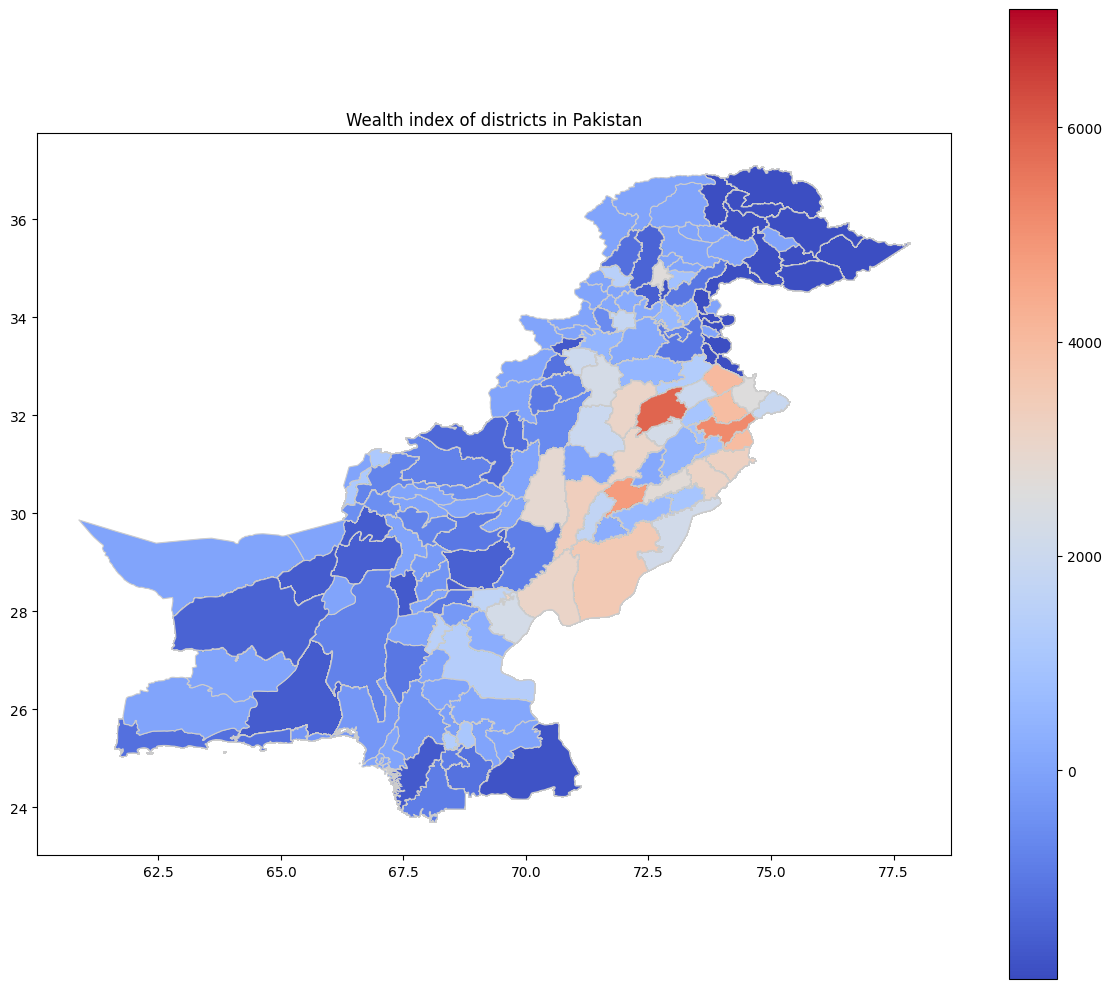

In [23]:
import geopandas as gpd
gdf = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm2_wfp_20220909.shp')

# Convert the district names to lowercase
gdf['ADM2_EN'] = gdf['ADM2_EN'].str.lower()
dhs_data_req['shdist'] = dhs_data_req['shdist'].str.lower()

# Left join on the district names
merged_data = gdf.merge(dhs_data_req, left_on='ADM2_EN', right_on='shdist', how='left')

# Fill NaN values with a default value (e.g., 0) or use another suitable method like interpolation
merged_data['Wealth_Index1'].fillna(0, inplace=True)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column='Wealth_Index1', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Wealth index of districts in Pakistan")
plt.tight_layout()
plt.show()


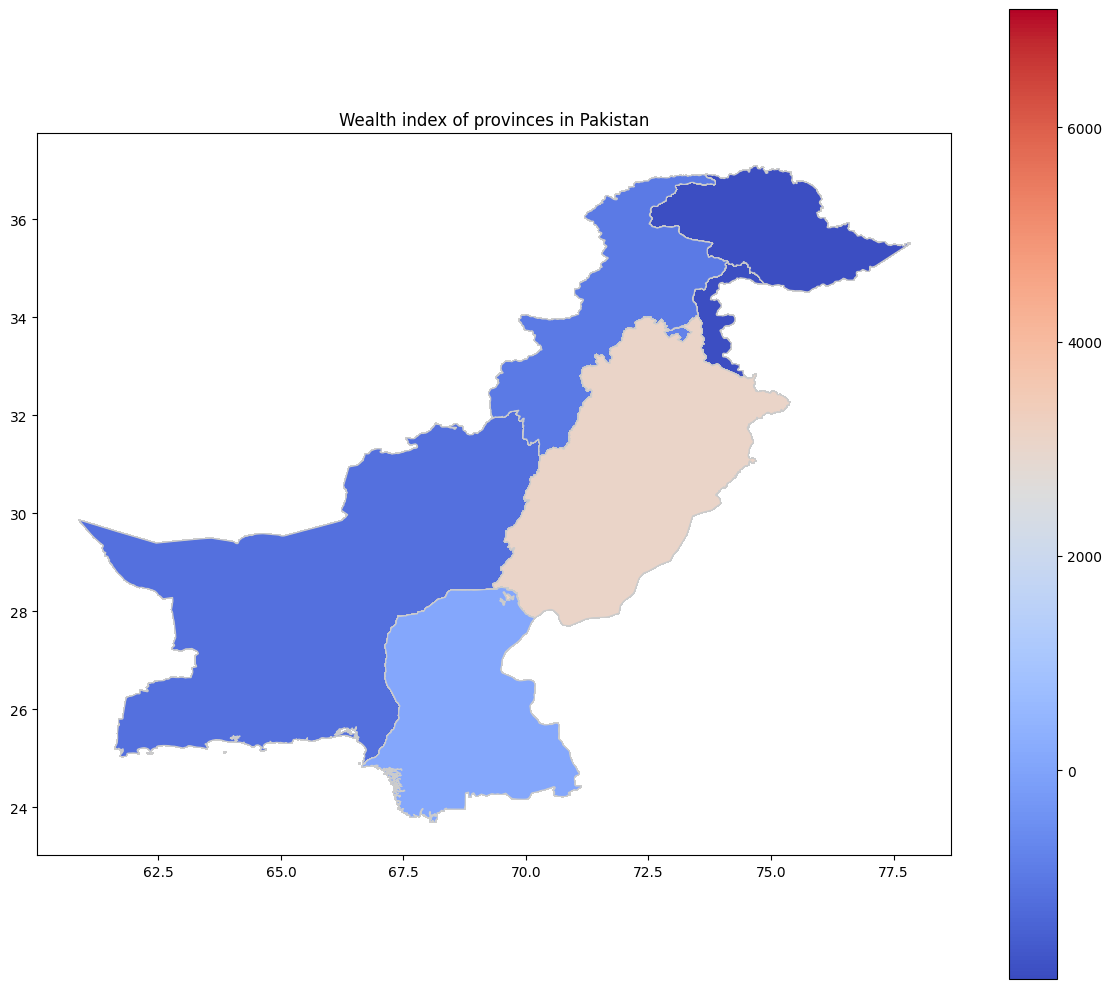

In [24]:
Provinces  = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm1_wfp_20220909.shp')

# Create a mapping between province names
province_mapping = {
    'Azad Kashmir': 'ajk',
    'Balochistan': 'balochistan',
    'Gilgit Baltistan': 'gb',
    'Islamabad': 'ict',
    'Khyber Pakhtunkhwa': 'kpk',
    'Punjab': 'punjab',
    'Sindh': 'sindh'
}

# Create a new column 'Province_Short' in the Provinces dataframe with the short form of the province name
Provinces['Province_Short'] = Provinces['ADM1_EN'].map(province_mapping)

# Left join on the province short names
merged_data = Provinces.merge(dhs_data_req, left_on='Province_Short', right_on='hv024', how='left')

# Fill NaN values with a default value (e.g., 0)
merged_data['Wealth_Index1'].fillna(0, inplace=True)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column='Wealth_Index1', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Wealth index of provinces in Pakistan")
plt.tight_layout()
plt.show()


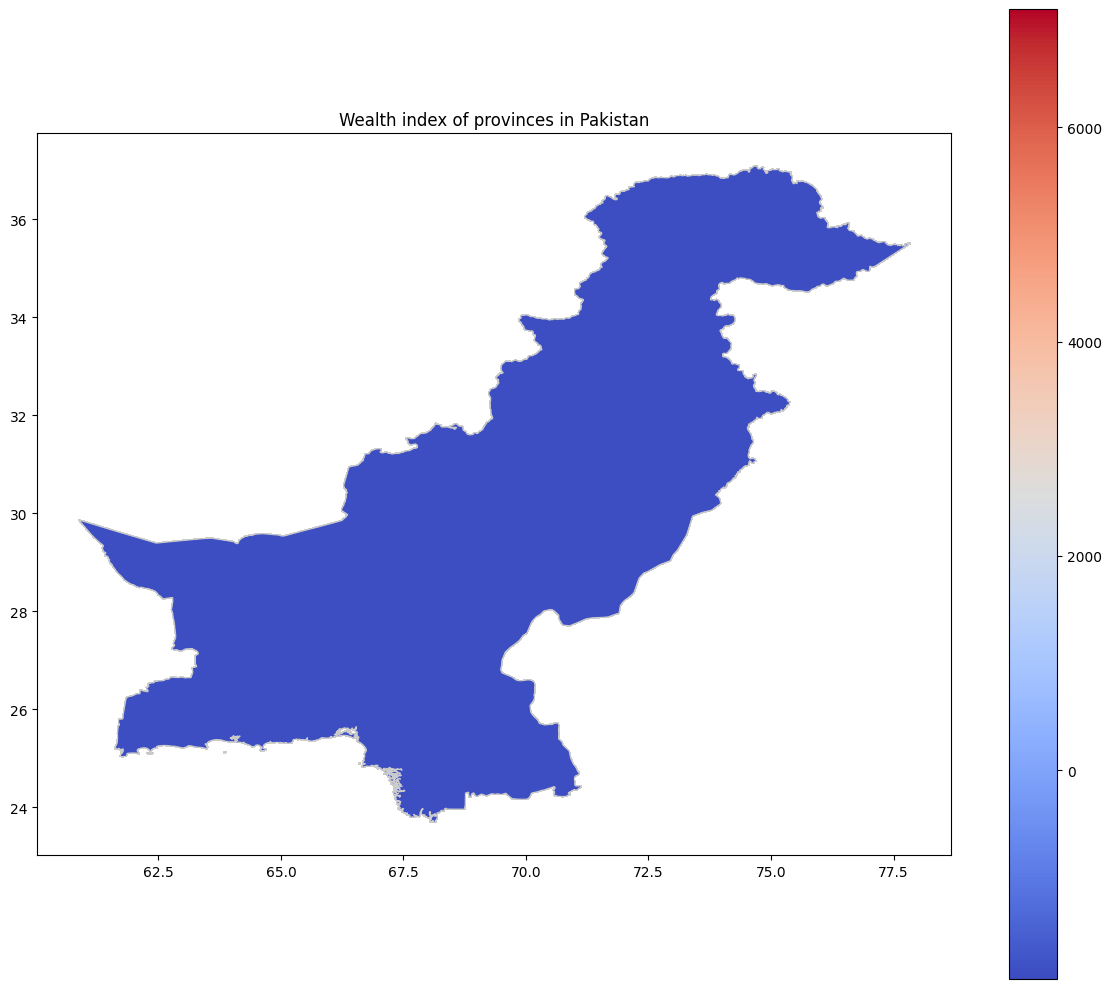

In [25]:
National  = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm0_wfp_20220909.shp')

# Create a mapping between province names
national_mapping = {
   'PK': 'PK7'
}

# Create a new column 'Province_Short' in the Provinces dataframe with the short form of the province name
National['national_Short'] = National['ADM0_PCODE'].map(national_mapping)

# Left join on the province short names
merged_data = National.merge(dhs_data_req, left_on='national_Short', right_on='hv000', how='left')

# Fill NaN values with a default value (e.g., 0)
#merged_data['Wealth_Index1'].fillna(0, inplace=True)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column='Wealth_Index1', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Wealth index of provinces in Pakistan")
plt.tight_layout()
plt.show()

## PCA for URBAN


In [ ]:
# Extract the selected columns
selected_variables = dhs_data_req[summaryCommonVarDF['Variables']].copy()
selected_variables = dhs_data_req[dhs_data_req['hv025']=='urban'][requiredColumns]

# Drop rows with missing values
selected_variables = selected_variables.dropna()

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_variables)

# Perform PCA
pca = PCA(n_components=1)
asset_index = pca.fit_transform(scaled_data)

# Print the explained variance
print('PCA variance explained: %.2f%%' % (100 * pca.explained_variance_ratio_[0]))

# Create the basis vector DataFrame
basis_vector = pd.DataFrame({'Asset': summaryCommonVarDF['Variables'], 'Magnitude': pca.components_[0]})

# Sort the basis vector by magnitude in descending order
basis_vector = basis_vector.sort_values(by='Magnitude', ascending=False)

# Save the basis vector to a CSV file
basis_vector.to_csv('asset_index_Urban_basis_vector.csv', index=False)

PCA variance explained: 15.50%


## PCA for RURAL



In [ ]:
# Extract the selected columns
selected_variables = dhs_data_req[summaryCommonVarDF['Variables']].copy()
selected_variables = dhs_data_req[dhs_data_req['hv025']=='rural'][requiredColumns]

# Drop rows with missing values
selected_variables = selected_variables.dropna()

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_variables)

# Perform PCA
pca = PCA(n_components=1)
asset_index = pca.fit_transform(scaled_data)

# Print the explained variance
print('PCA variance explained: %.2f%%' % (100 * pca.explained_variance_ratio_[0]))

# Create the basis vector DataFrame
basis_vector = pd.DataFrame({'Asset': summaryCommonVarDF['Variables'], 'Magnitude': pca.components_[0]})

# Sort the basis vector by magnitude in descending order
basis_vector = basis_vector.sort_values(by='Magnitude', ascending=False)

# Save the basis vector to a CSV file
basis_vector.to_csv('asset_index_Rural_basis_vector.csv', index=False)

PCA variance explained: 16.94%


In [ ]:
#from google.colab import files
#basis_vector.to_csv('asset_index_Rural_basis_vector.csv', index=False)
#files.download('asset_index_Rural_basis_vector.csv')